In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# load processed dataset
data = np.load("../data/processed_data.npz")
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

In [3]:
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -1.78226765,
        -0.32901188,  1.15204324],
       [ 0.        ,  0.        ,  0.        , ...,  0.04559702,
        -0.0205555 ,  1.31122015],
       [ 0.        ,  0.        ,  0.        , ..., -0.15297687,
         1.35569041, -0.8118748 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.35497111,
        -1.87093051, -0.8118748 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.26932566,
         0.20849726,  1.22841048],
       [ 0.        ,  0.        ,  0.        , ..., -0.8275492 ,
        -0.62155968,  1.20006493]], shape=(3506, 54))

In [4]:
# Scaling Target Variables for SVR
sc = StandardScaler()
y_train_scaled = sc.fit_transform(y_train.reshape(-1,1)).ravel()

In [5]:
# train the model
svr_regressor = SVR(kernel='linear', C=100, epsilon=0.1) # rbf for nonlinear
svr_regressor.fit(X_train, y_train_scaled)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [19]:
#print the coefficients
print(svr_regressor.coef_)

[[ 0.24794394  2.32106283  1.6482128   0.58716762  1.06340947  0.61512206
   0.84881684  2.54256373  0.3012737   0.32930694  0.78890793  0.3329949
   1.13890236  0.25293268  0.          1.30152979  1.02195946  0.34366692
   1.38930947  1.04410724  0.46854069  2.70318265  1.92892634  0.78646623
   1.31285057  1.18745519  0.84605631  0.2219441   0.91258686  0.8835763
   1.49046182  0.66111993  1.36668256  0.21831042  1.52937338  0.99202549
   0.32677383  0.97602465  1.20339692  0.24622661  0.69997913  1.18018489
   2.54178765 -0.07873343  0.09204336  0.05268693  0.79114195  0.11391569
   0.0494807  -0.00680704  0.07133688  0.03333748  0.57407214 -0.07873813]]


In [8]:
# predicting the test set
y_pred_scaled = svr_regressor.predict(X_test)
y_pred = sc.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_pred

array([12.96416428, 13.46370094, 13.18713275, 12.47642305, 13.6896536 ,
       12.84240487, 12.33745385, 12.30128939, 12.87216893, 12.7141061 ,
       12.16665416, 13.18480463, 13.44284589, 12.70711042, 13.02863108,
       13.54137763, 12.91862756, 13.42292544, 12.10980896, 12.36503028,
       13.77881486, 12.2187077 , 13.06817842, 13.14240367, 13.05276728,
       13.22123862, 12.53809361, 13.33967787, 12.83444054, 13.57650998,
       13.92733797, 13.29869029, 13.06657609, 12.73540046, 13.30285571,
       13.18131278, 12.95537166, 12.82654547, 12.66425356, 12.65968238,
       12.63145771, 13.64225738, 13.10656654, 13.21857214, 13.15929091,
       12.95343751, 13.13858646, 13.87937888, 13.79225335, 12.79869597,
       13.48978897, 13.12676702, 13.16526192, 13.23967313, 13.0151864 ,
       12.9353219 , 13.51946852, 13.10237856, 12.82511117, 12.90436123,
       13.24902139, 11.62031183, 13.59880366, 13.25375827, 13.13749219,
       13.11896951, 12.81076449, 13.41771812, 12.72503454, 12.35

In [9]:
# compare predicted values vs Actual values
print(np.concatenate((y_pred.reshape(-1,1).round(2), y_test.reshape(-1,1).round(2)),1))

[[12.96 13.14]
 [13.46 13.85]
 [13.19 13.34]
 ...
 [12.77 12.57]
 [12.38 12.54]
 [13.88 13.72]]


In [13]:
# predicting for one sample
one_sample = X_test[0]
y_hat_1_scaled = svr_regressor.predict([one_sample])[0]
y_hat_1 = sc.inverse_transform(y_hat_1_scaled.reshape(-1, 1)).ravel()
print(np.expm1(y_hat_1).round(2))

[426838.9]


In [14]:
# measure model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 0.190
Mean Squared Error (MSE): 0.071
Root Mean Squared Error (RMSE): 0.266
R² Score: 0.753


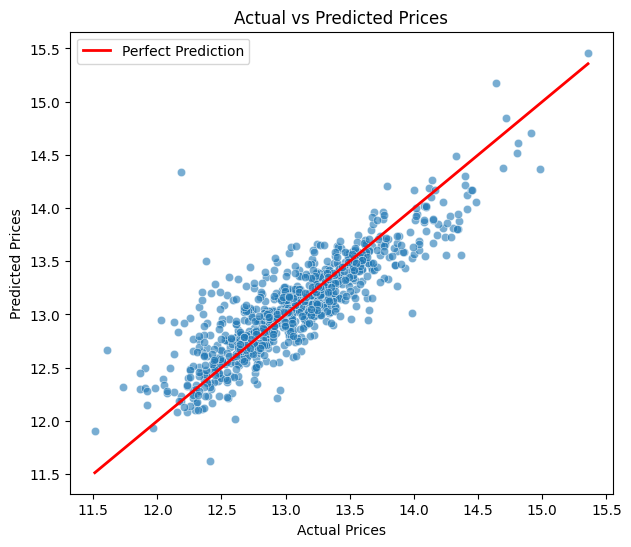

In [15]:
# visualize model performance
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


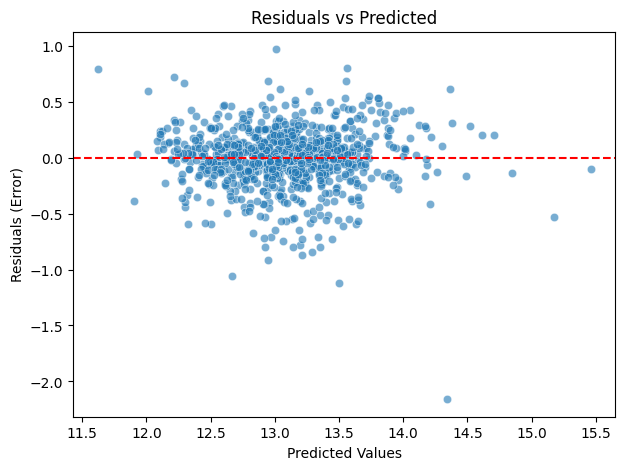

In [16]:
# residual plot
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.title("Residuals vs Predicted")
plt.show()

In [20]:
# check feature importance (coefficients)
coeffs = pd.DataFrame({
    'Feature': ['bedrooms','bathrooms','floors', 'waterfront','view', 'condition', 'was_renovated', 'age', 'sqft_lot', 'sqft_living','sqft_basement'],
    'Coefficient': svr_regressor.coef_.flatten()[43:],
    'Intercept': float(svr_regressor.intercept_)
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
coeffs

/tmp/ipykernel_313775/3355037926.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'Intercept': float(svr_regressor.intercept_)


,Feature,Coefficient,Intercept
0,waterfront,0.791142,-1.157351
1,sqft_living,0.574072,-1.157351
2,view,0.113916,-1.157351
3,bathrooms,0.092043,-1.157351
4,age,0.071337,-1.157351
5,floors,0.052687,-1.157351
6,condition,0.049481,-1.157351
7,sqft_lot,0.033337,-1.157351
8,was_renovated,-0.006807,-1.157351
9,bedrooms,-0.078733,-1.157351
